In [86]:
import pandas as pd
import os 
import plotnine as p9
import warnings              #To remove warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt

## Home Advantage of GSW

In [3]:
# get Scores for each game of GSW in the last two seasons
home = pd.concat([pd.read_excel("gameoutcome2017-18.xlsx")[['Unnamed: 5', 'Unnamed: 7']], pd.read_csv("gameoutcome2016-17.csv")[['Unnamed: 5', 'Unnamed: 7']]])
home.columns = ['home', 'result']
home.fillna('N', inplace = True)
home['home'].replace("@", 'Y', inplace = True)

In [4]:
# calculate count of winnings depending on home variable
home.groupby(['home', 'result']).size()

home  result
N     L         17
      W         65
Y     L         22
      W         60
dtype: int64

Exactly half of games were done in home stadium. Roughly judging by counts of result of games, it seems like there is no home advantage to this team.

In [5]:
# winning ratio when the match was not played at home stadium of GSW
print(round(len(home[(home['home'] == "N") & (home['result'] == 'W')])/len(home[home['home'] == "N"]),3))
# winning ratio of home stadium matches
print(round(len(home[(home['home'] == "Y") & (home['result'] == 'W')])/len(home[home['home'] == "Y"]),3))

0.793
0.732


Thus, it is pretty obvious that location does not impact on GSW's outcome, which is contradicting to our preassumptions.

In [6]:
data = pd.concat([pd.read_excel("gameoutcome2017-18.xlsx")[['Unnamed: 5', 'Tm', 'Opp', 'Unnamed: 7']], 
                  pd.read_csv("gameoutcome2016-17.csv")[['Unnamed: 5',  'Tm', 'Opp', 'Unnamed: 7']]])

In [7]:
data.columns = ['home', 'Tm', 'Opp','WL']
data.fillna('N', inplace = True)
data.replace('@', 'Y', inplace = True)
data['diff'] = data['Tm'] - data['Opp']

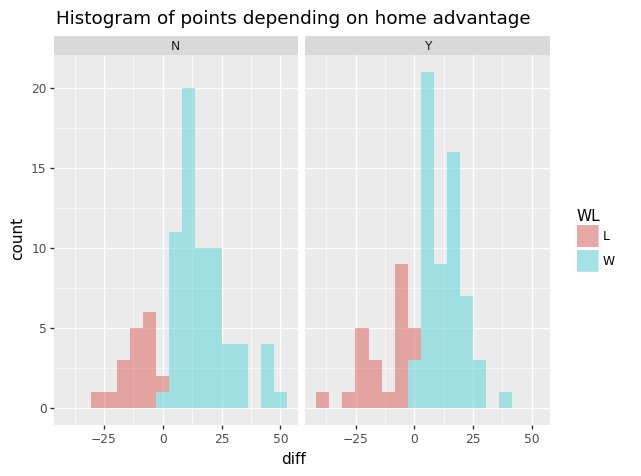

<ggplot: (293218708)>

In [8]:
p9.ggplot(data) \
+ p9.aes(x = 'diff', fill = 'WL') \
+ p9.geom_histogram(alpha=.5) \
+ p9.facet_wrap('~home', ncol = 4) \
+ p9.labels.ggtitle('Histogram of points depending on home advantage')

Specifically, we drew a plot of points difference between GSW and opponents. Obviously, non-positive values mean that GSW lost. We saw that winnning rate is slightly higher at other places than GSW's home stadium. As seen in the plot above, it seems like there is no advantage of home stadiums. Plus, no matter where plays are done, this team does so well.

## Assistance Effect on Scores

In [87]:
##  pip install nba_api

from nba_api.stats.static import teams

nba_teams = teams.get_teams()
warriors = [team for team in nba_teams if team['abbreviation'] == 'GSW'][0]
warriors_id = warriors['id']

from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=warriors_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]

games.SEASON_ID = games.SEASON_ID.str[-4:].map(int)
games_all = games[games.SEASON_ID >= 2012]
games_all  

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,2018,1610612744,GSW,Golden State Warriors,0021800377,2018-12-07,GSW @ MIL,W,241,105,...,0.857,6.0,37.0,43.0,32,7.0,6,17.0,20,10.0
1,2018,1610612744,GSW,Golden State Warriors,0021800355,2018-12-05,GSW @ CLE,W,240,129,...,0.875,9.0,37.0,46.0,29,6.0,5,8.0,17,24.0
2,2018,1610612744,GSW,Golden State Warriors,0021800344,2018-12-03,GSW @ ATL,W,240,128,...,0.864,6.0,33.0,39.0,33,10.0,8,20.0,24,17.0
3,2018,1610612744,GSW,Golden State Warriors,0021800331,2018-12-01,GSW @ DET,L,239,102,...,0.857,8.0,36.0,44.0,23,6.0,5,14.0,22,-9.0
4,2018,1610612744,GSW,Golden State Warriors,0021800316,2018-11-29,GSW @ TOR,L,265,128,...,0.850,17.0,29.0,46.0,27,6.0,5,14.0,22,-3.0
5,2018,1610612744,GSW,Golden State Warriors,0021800300,2018-11-26,GSW vs. ORL,W,240,116,...,0.913,10.0,36.0,46.0,21,8.0,7,14.0,19,6.0
6,2018,1610612744,GSW,Golden State Warriors,0021800285,2018-11-24,GSW vs. SAC,W,238,117,...,0.862,12.0,42.0,54.0,28,5.0,6,14.0,24,1.0
7,2018,1610612744,GSW,Golden State Warriors,0021800277,2018-11-23,GSW vs. POR,W,241,125,...,0.750,6.0,37.0,43.0,29,11.0,10,15.0,22,28.0
8,2018,1610612744,GSW,Golden State Warriors,0021800264,2018-11-21,GSW vs. OKC,L,241,95,...,0.667,7.0,35.0,42.0,24,7.0,10,17.0,18,-28.0
9,2018,1610612744,GSW,Golden State Warriors,0021800238,2018-11-18,GSW @ SAS,L,239,92,...,0.810,10.0,36.0,46.0,20,6.0,4,11.0,17,-12.0


In [11]:
games_all.columns  

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [12]:
ast = games_all[['SEASON_ID','AST', 'WL']]
ast.dropna(inplace = True) # there is one row without play outcome, so drop it
ast.head(15)

,SEASON_ID,AST,WL
0,2018,32,W
1,2018,29,W
2,2018,33,W
3,2018,23,L
4,2018,27,L
5,2018,21,W
6,2018,28,W
7,2018,29,W
8,2018,24,L
9,2018,20,L


In [13]:
# average AST values for each season among every NBA teams
total_games = leaguegamefinder.LeagueGameFinder()
tgames = total_games.get_data_frames()[0]
tgames.SEASON_ID = tgames.SEASON_ID.str[-4:].map(int)
tgames_all = tgames[tgames.SEASON_ID >= 2012]
avg_ast = pd.DataFrame(tgames_all.groupby('SEASON_ID')['AST'].mean().round(2))
avg_ast.columns = ['Others']

In [14]:
avg_ast_gsw = pd.DataFrame(ast.groupby('SEASON_ID')['AST'].mean().round(2))
avg_ast_gsw.columns = ['GSW']

In [15]:
result = pd.concat([avg_ast, avg_ast_gsw], axis=1)
result

,Others,GSW
SEASON_ID,,
2012,20.58,21.80
2013,20.72,22.50
2014,20.91,26.18
2015,20.81,26.99
2016,21.26,28.95
2017,22.04,27.83
2018,21.43,25.22


Text(0, 0.5, 'Counts')

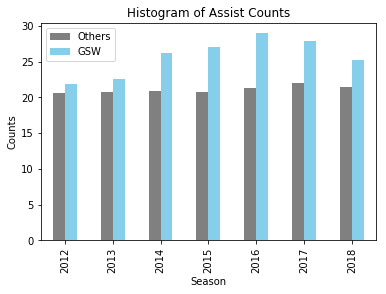

In [16]:
result.plot.bar(color = ['grey','skyblue'])
plt.title("Histogram of Assist Counts")
plt.xlabel("Season")
plt.ylabel("Counts")

## Predictions

Through analysis on variables, we decided to utilize 'FG_PCT', 'FG3_PCT', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV' of data sets to build a prediction model. 

In [88]:
# 2017 season
total_games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]
total_games = total_games[total_games.SEASON_ID.str[-4:] == '2017']
total_games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
1896,42017,1610612739,CLE,Cleveland Cavaliers,0041700404,2018-06-08,CLE vs. GSW,L,242,85,...,0.680,17,27,44,21,5,5,11,22,-23.0
1897,42017,1610612744,GSW,Golden State Warriors,0041700404,2018-06-08,GSW @ CLE,W,241,108,...,1.000,10,34,44,25,7,13,8,24,23.0
1904,42017,1610612744,GSW,Golden State Warriors,0041700403,2018-06-06,GSW @ CLE,W,239,110,...,0.895,6,31,37,27,6,5,10,20,8.0
1905,42017,1610612739,CLE,Cleveland Cavaliers,0041700403,2018-06-06,CLE vs. GSW,L,240,102,...,0.765,15,32,47,20,6,4,13,18,-8.0
1911,42017,1610612739,CLE,Cleveland Cavaliers,0041700402,2018-06-03,CLE @ GSW,L,238,103,...,0.769,16,26,42,25,9,4,10,15,-19.0
1916,42017,1610612744,GSW,Golden State Warriors,0041700402,2018-06-03,GSW vs. CLE,W,238,122,...,0.619,7,34,41,28,3,8,12,25,19.0
1931,42017,1610612739,CLE,Cleveland Cavaliers,0041700401,2018-05-31,CLE @ GSW,L,264,114,...,0.727,19,34,53,18,5,3,11,18,-10.0
1933,42017,1610612744,GSW,Golden State Warriors,0041700401,2018-05-31,GSW vs. CLE,W,264,124,...,0.950,4,34,38,31,10,6,7,18,10.0
1942,42017,1610612745,HOU,Houston Rockets,0041700317,2018-05-28,HOU vs. GSW,L,241,92,...,0.591,17,27,44,17,13,3,12,17,-9.0
1943,42017,1610612744,GSW,Golden State Warriors,0041700317,2018-05-28,GSW @ HOU,W,239,101,...,0.500,11,31,42,25,9,7,16,22,9.0


In [89]:
cols = ['FG_PCT','FG3_PCT', 'FTM', 'FTA', 'OREB', 'DREB','AST', 'STL', 'BLK', 'TOV']
cols

['FG_PCT', 'FG3_PCT', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV']

In [90]:
for game in range(len(total_games)-1):
    if total_games['GAME_ID'].iloc[game] == total_games['GAME_ID'].iloc[game + 1]:
        for i in range(len(cols)):
            item = cols[i]
            team_a = total_games[item].iloc[game]
            team_b = total_games[item].iloc[game+1]
            total_games[item].iloc[game] = team_a - team_b
            total_games[item].iloc[game+1] = team_b - team_a
total_games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
1896,42017,1610612739,CLE,Cleveland Cavaliers,0041700404,2018-06-08,CLE vs. GSW,L,242,85,...,0.680,7,-7,44,-4,-2,-8,3,22,-23.0
1897,42017,1610612744,GSW,Golden State Warriors,0041700404,2018-06-08,GSW @ CLE,W,241,108,...,1.000,-7,7,44,4,2,8,-3,24,23.0
1904,42017,1610612744,GSW,Golden State Warriors,0041700403,2018-06-06,GSW @ CLE,W,239,110,...,0.895,-9,-1,37,7,0,1,-3,20,8.0
1905,42017,1610612739,CLE,Cleveland Cavaliers,0041700403,2018-06-06,CLE vs. GSW,L,240,102,...,0.765,9,1,47,-7,0,-1,3,18,-8.0
1911,42017,1610612739,CLE,Cleveland Cavaliers,0041700402,2018-06-03,CLE @ GSW,L,238,103,...,0.769,9,-8,42,-3,6,-4,-2,15,-19.0
1916,42017,1610612744,GSW,Golden State Warriors,0041700402,2018-06-03,GSW vs. CLE,W,238,122,...,0.619,-9,8,41,3,-6,4,2,25,19.0
1931,42017,1610612739,CLE,Cleveland Cavaliers,0041700401,2018-05-31,CLE @ GSW,L,264,114,...,0.727,15,0,53,-13,-5,-3,4,18,-10.0
1933,42017,1610612744,GSW,Golden State Warriors,0041700401,2018-05-31,GSW vs. CLE,W,264,124,...,0.950,-15,0,38,13,5,3,-4,18,10.0
1942,42017,1610612745,HOU,Houston Rockets,0041700317,2018-05-28,HOU vs. GSW,L,241,92,...,0.591,6,-4,44,-8,4,-4,-4,17,-9.0
1943,42017,1610612744,GSW,Golden State Warriors,0041700317,2018-05-28,GSW @ HOU,W,239,101,...,0.500,-6,4,42,8,-4,4,4,22,9.0


In [91]:
total_games.WL.replace("L",0,inplace = True)
total_games.WL.replace("W",1,inplace = True)
total_games.dropna(inplace=True)

In [92]:
y = total_games[['WL']]
X = total_games[['FG_PCT','FG3_PCT', 'FTM', 'FTA', 'OREB', 'DREB','AST', 'STL', 'BLK', 'TOV']]
X.head()

,FG_PCT,FG3_PCT,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV
1896,-0.108,-0.072,1,9,7,-7,-4,-2,-8,3
1897,0.108,0.072,-1,-9,-7,7,4,2,8,-3
1904,0.084,0.056,4,2,-9,-1,7,0,1,-3
1905,-0.084,-0.056,-4,-2,9,1,-7,0,-1,3
1911,-0.162,-0.084,7,5,9,-8,-3,6,-4,-2


In [93]:
# split data sets into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3822, 10) (3822, 1)
(956, 10) (956, 1)


In [94]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
predictions = logisticRegr.predict(X_test)

In [96]:
score = logisticRegr.score(X_test, y_test)
print(round(score,3)) 

0.674


This model above has about 69.4% accuracy with the last season data.

Using this model, we figured out how this model matches well with current season, 2018-19.

In [97]:
# games for 2018
games_201819 = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]
games_201819 = games_201819[games_201819.SEASON_ID.str[-4:] == '2018']
games_201819.dropna(inplace = True)

In [98]:
games_201819 = games_201819.sort_values('GAME_ID')

Same process as above

In [99]:
for game in range(len(games_201819)-1):
    if games_201819['GAME_ID'].iloc[game] == games_201819['GAME_ID'].iloc[game + 1]:
        for i in range(len(cols)):
            item = cols[i]
            team_a = games_201819[item].iloc[game]
            team_b = games_201819[item].iloc[game+1]
            games_201819[item].iloc[game] = team_a - team_b
            games_201819[item].iloc[game+1] = team_b - team_a

In [100]:
games_201819.WL.replace("L",0,inplace = True)
games_201819.WL.replace("W",1,inplace = True)
games_201819.dropna(inplace=True)
y18 = games_201819[['WL']]
X18 = games_201819[['FG_PCT','FG3_PCT', 'FTM', 'FTA', 'OREB', 'DREB','AST', 'STL', 'BLK', 'TOV']]
X18.head()

,FG_PCT,FG3_PCT,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV
1310,0.104,-0.066,3,11,3,8,10,3,8,-3
1311,-0.104,0.066,-3,-11,-3,-8,-10,-3,-8,3
1313,0.036,0.115,9,17,1,8,5,-5,0,5
1312,-0.036,-0.115,-9,-17,-1,-8,-5,5,0,-5
1307,0.005,0.044,-24,-26,-1,2,10,-4,-4,9


In [102]:
predictions_18 = logisticRegr.predict(X18)
score = logisticRegr.score(X18, y18)
print(round(score,3)) 

0.683


Looks like it has pretty similar outputs as results of last season data. 

## Attachment: Confusion Matrix

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [76]:
cm = metrics.confusion_matrix(y_test, predictions)

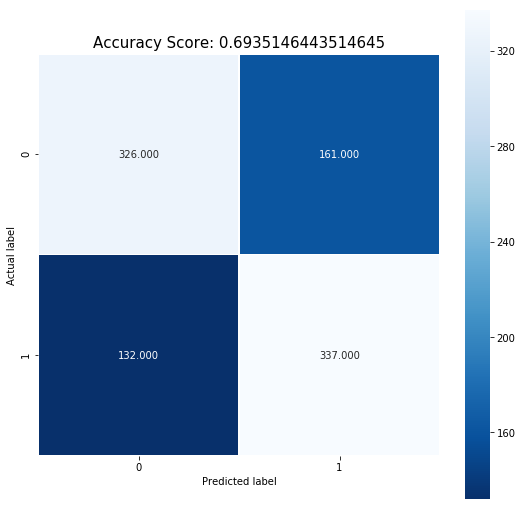

In [77]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);